<a href="https://colab.research.google.com/github/Duku-code/Duku/blob/main/Certification_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [31]:
existing_df = pd.read_csv('Certification Project 2.csv', index_col = 0, thousands  = ',')
existing_df.index.names = ['country']
existing_df.columns.names = ['year']
existing_df.head()

year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
country,,,,,,,,,,,,,,,,,,
Afghanistan,436,429,422,415,407,397,397,387,374,373,346,326,304,308,283,267,251,238
Albania,42,40,41,42,42,43,42,44,43,42,40,34,32,32,29,29,26,22
Algeria,45,44,44,43,43,42,43,44,45,46,48,49,50,51,52,53,55,56
American Samoa,42,14,4,18,17,22,0,25,12,8,8,6,5,6,9,11,9,5
Andorra,39,37,35,33,32,30,28,23,24,22,20,20,21,18,19,18,17,19


In [32]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(existing_df)

PCA(n_components=2)

In [33]:
existing_2d = pca.transform(existing_df)

In [34]:
existing_df_2d = pd.DataFrame(existing_2d)
existing_df_2d.index = existing_df.index
existing_df_2d.columns = ['PC1','PC2']
existing_df_2d.head()

,PC1,PC2
country,,
Afghanistan,732.215864,203.381494
Albania,-613.296510,4.715978
Algeria,-569.303713,-36.837051
American Samoa,-717.082766,5.464696
Andorra,-661.802241,11.037736


In [35]:
print(pca.explained_variance_ratio_)

[0.91808789 0.060556  ]


In [13]:
data.isna().sum()

Country    0
1990       0
1991       0
1992       0
1993       0
1994       0
1995       0
1996       0
1997       0
1998       0
1999       0
2000       0
2001       0
2002       0
2003       0
2004       0
2005       0
2006       0
2007       0
dtype: int64

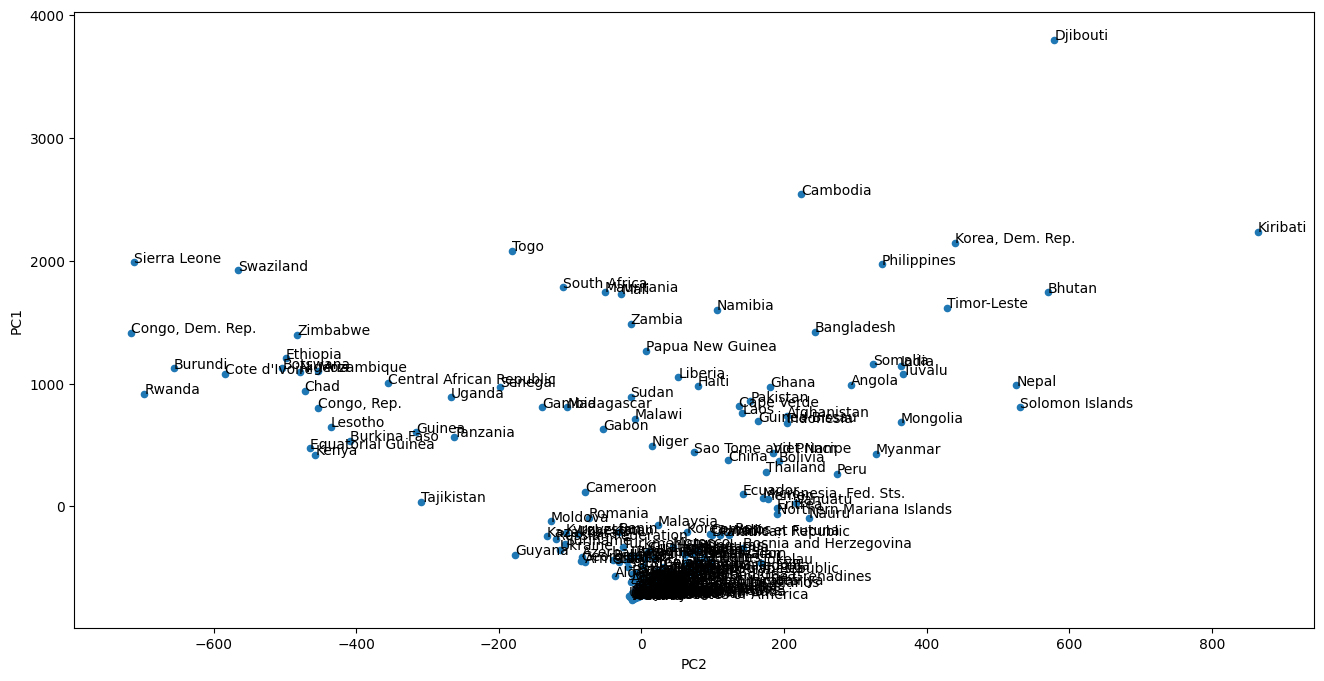

In [36]:
%matplotlib inline

ax = existing_df_2d.plot(kind='scatter', x='PC2', y='PC1', figsize=(16,8))

for i, country in enumerate(existing_df.index):
    ax.annotate(country, (existing_df_2d.iloc[i].PC2, existing_df_2d.iloc[i].PC1))

In [37]:
from sklearn.preprocessing import normalize

existing_df_2d['country_mean'] = pd.Series(existing_df.mean(axis=1), index=existing_df_2d.index)
country_mean_max = existing_df_2d['country_mean'].max()
country_mean_min = existing_df_2d['country_mean'].min()
country_mean_scaled = (existing_df_2d.country_mean-country_mean_min) / country_mean_max
existing_df_2d['country_mean_scaled'] = pd.Series(
    country_mean_scaled, 
    index=existing_df_2d.index)
existing_df_2d.head()

,PC1,PC2,country_mean,country_mean_scaled
country,,,,
Afghanistan,732.215864,203.381494,353.333333,0.329731
Albania,-613.296510,4.715978,36.944444,0.032420
Algeria,-569.303713,-36.837051,47.388889,0.042234
American Samoa,-717.082766,5.464696,12.277778,0.009240
Andorra,-661.802241,11.037736,25.277778,0.021457


<Axes: xlabel='PC2', ylabel='PC1'>

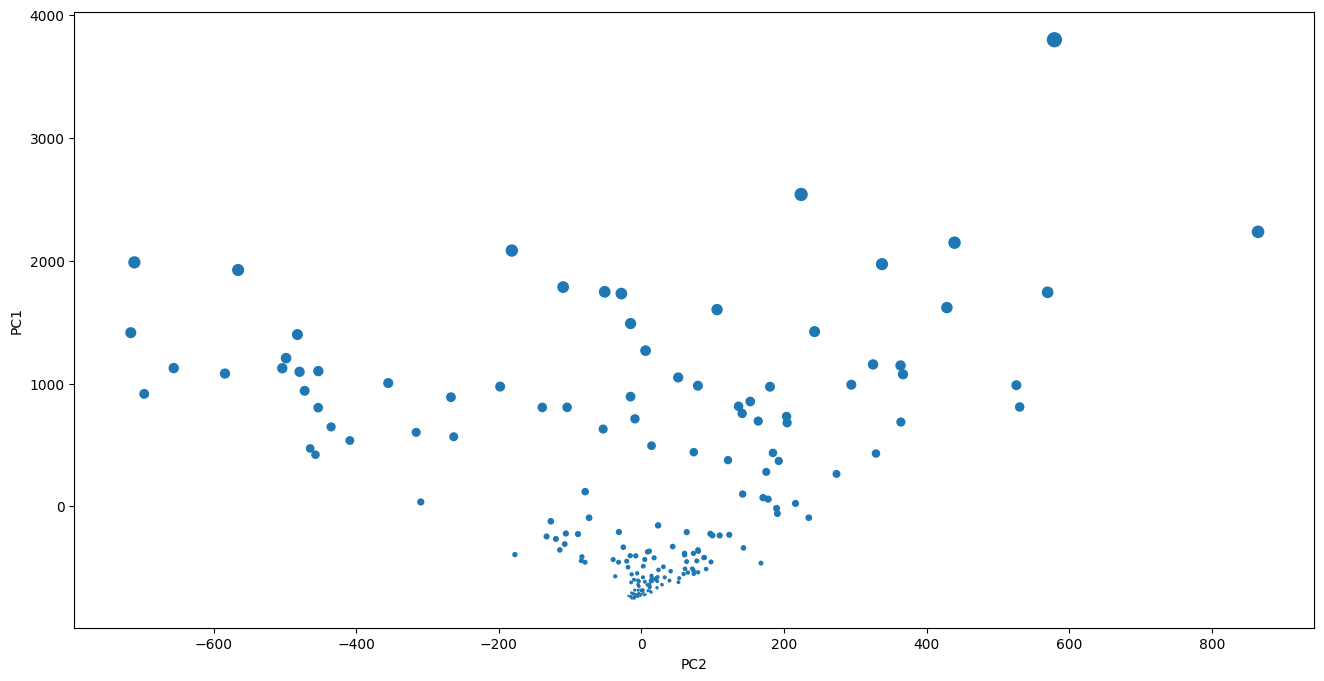

In [38]:
existing_df_2d.plot(kind='scatter', x='PC2', y='PC1', s=existing_df_2d['country_mean_scaled']*100, figsize=(16,8))

<Axes: xlabel='PC2', ylabel='PC1'>

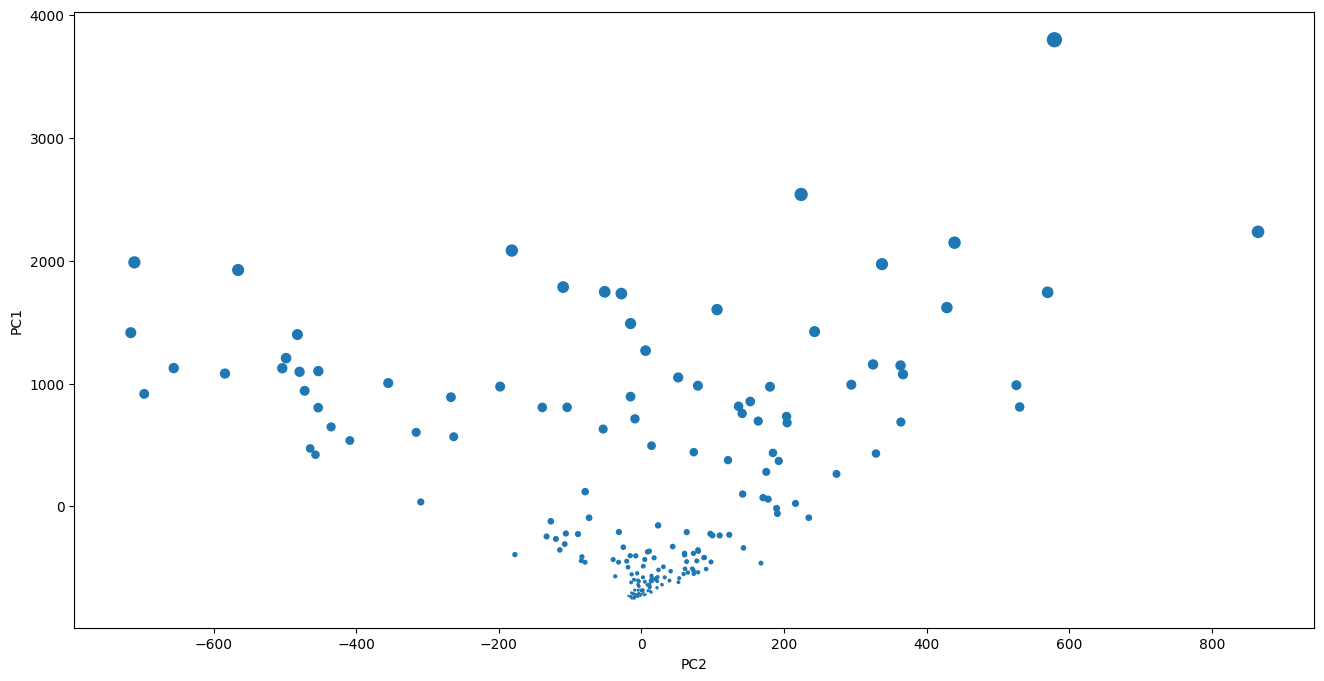

In [39]:
existing_df_2d['country_sum'] = pd.Series(existing_df.sum(axis=1), index=existing_df_2d.index)
country_sum_max = existing_df_2d['country_sum'].max()
country_sum_min = existing_df_2d['country_sum'].min()
country_sum_scaled = (existing_df_2d.country_sum-country_sum_min) / country_sum_max
existing_df_2d['country_sum_scaled'] = pd.Series(
    country_sum_scaled, 
    index=existing_df_2d.index)
existing_df_2d.plot(kind='scatter', x='PC2', y='PC1', s=existing_df_2d['country_sum_scaled']*100, figsize=(16,8))

In [40]:
existing_df_2d['country_change'] = pd.Series(existing_df['2007']-existing_df['1990'], index=existing_df_2d.index)
country_change_max = existing_df_2d['country_change'].max()
country_change_min = existing_df_2d['country_change'].min()
country_change_scaled = (existing_df_2d.country_change - country_change_min) / country_change_max
existing_df_2d['country_change_scaled'] = pd.Series(
    country_change_scaled, 
    index=existing_df_2d.index)
existing_df_2d[['country_change','country_change_scaled']].head()

,country_change,country_change_scaled
country,,
Afghanistan,-198,0.850840
Albania,-20,1.224790
Algeria,11,1.289916
American Samoa,-37,1.189076
Andorra,-20,1.224790


<Axes: xlabel='PC2', ylabel='PC1'>

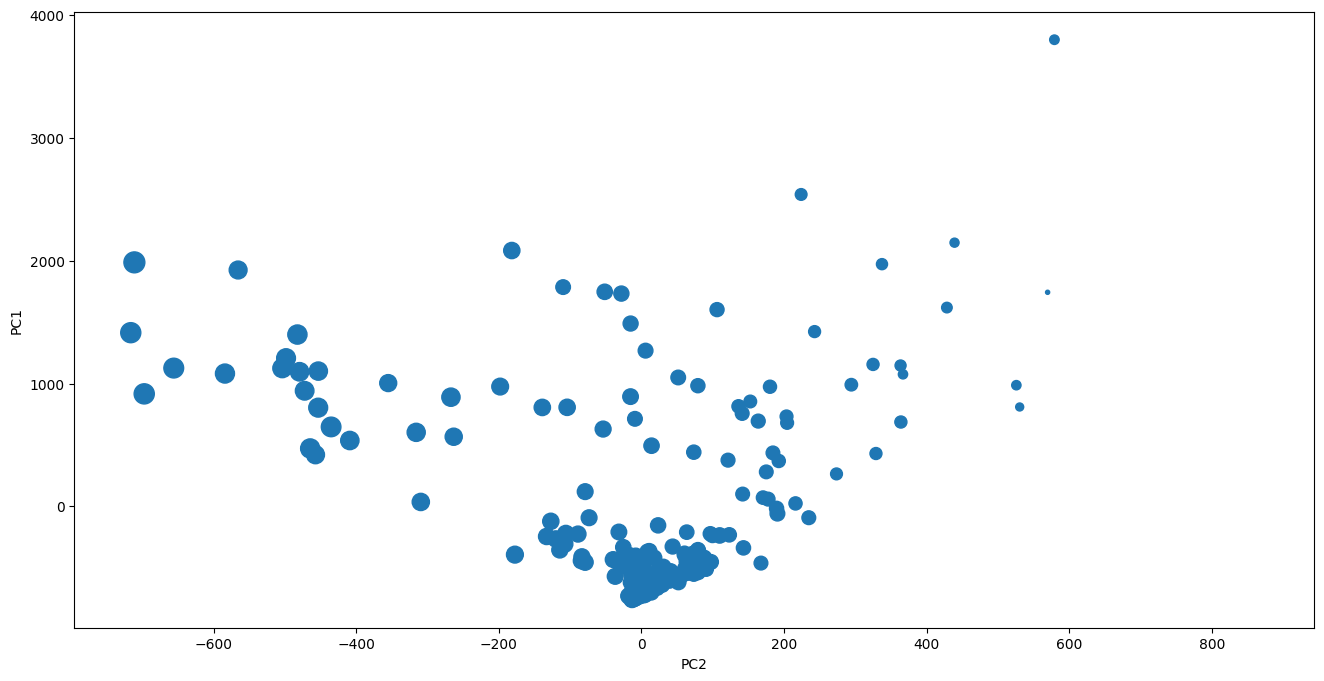

In [41]:
existing_df_2d.plot(kind='scatter', x='PC2', y='PC1', s=existing_df_2d['country_change_scaled']*100, figsize=(16,8))

2864630519.107113
617276039.480596
305921263.59148216
215163688.5129946
147623804.24965233
98225231.9616396
75357497.20619148
55625989.47972947
45256597.338010445


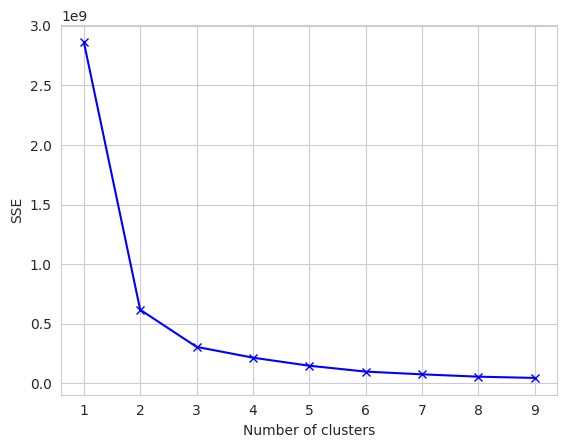

In [57]:
sse = {}

for k in range(1,10):
  kmeans = KMeans(n_clusters=k, random_state=1)
  kmeans.fit(existing_df_2d)
  sse[k] = kmeans.inertia_
  print(kmeans.inertia_)

plt.plot(list(sse.keys()), list(sse.values()),'bx-')
plt.xlabel('Number of clusters')
plt.ylabel("SSE")
plt.show()

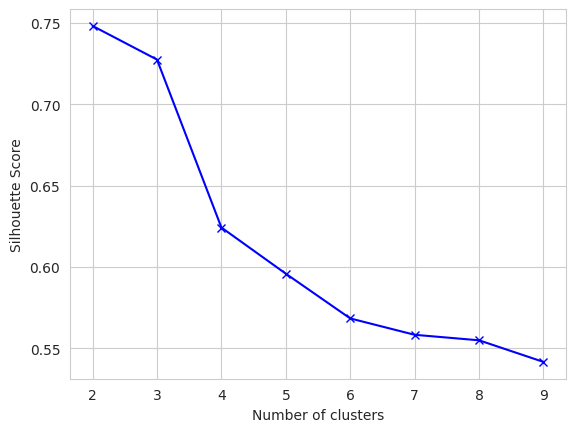

In [58]:
sc = {}

for k in range(2,10):
  kmeans = KMeans(n_clusters=k, random_state=1)
  kmeans.fit(existing_df_2d)
  labels = kmeans.predict(existing_df_2d)
  sc[k] = silhouette_score(existing_df_2d,labels)
  

plt.plot(list(sc.keys()), list(sc.values()),'bx-')
plt.xlabel('Number of clusters')
plt.ylabel("Silhouette Score")
plt.show()

In [59]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)

clusters = kmeans.fit(existing_df)

In [62]:
kmeans = KMeans(n_clusters=3,random_state=1)
kmeans.fit(existing_df_2d)
existing_df['cluster_label'] = kmeans.predict(existing_df_2d)

In [64]:
existing_df.head()

year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,cluster_label
country,,,,,,,,,,,,,,,,,,,
Afghanistan,436,429,422,415,407,397,397,387,374,373,346,326,304,308,283,267,251,238,0
Albania,42,40,41,42,42,43,42,44,43,42,40,34,32,32,29,29,26,22,1
Algeria,45,44,44,43,43,42,43,44,45,46,48,49,50,51,52,53,55,56,1
American Samoa,42,14,4,18,17,22,0,25,12,8,8,6,5,6,9,11,9,5,1
Andorra,39,37,35,33,32,30,28,23,24,22,20,20,21,18,19,18,17,19,1


In [65]:
existing_df.groupby('cluster_label').agg(['mean','median','count'])

year                 1990                     1991                     1992  \
                     mean median count        mean median count        mean   
cluster_label                                                                 
0              371.833333  366.0    48  373.145833  361.5    48  370.604167   
1               71.035461   52.0   141   71.035461   51.0   141   68.241135   
2              717.111111  676.0    18  707.888889  686.0    18  694.500000   

year                              1993  ...  2004        2005               \
              median count        mean  ... count        mean median count   
cluster_label                           ...                                  
0              351.0    48  369.000000  ...    48  368.333333  360.5    48   
1               54.0   141   68.092199  ...   141   47.907801   31.0   141   
2              672.0    18  681.111111  ...    18  611.111111  579.5    18   

year                 2006                     2007               
                     mean median count        mean median count  
cluster_label                                                    
0              361.541667  354.0    48  360.708333  352.5    48  
1               47.078014   29.0   141   45.361702   28.0   141  
2              610.833333  574.5    18  606.222222  579.0    18  

[3 rows x 54 columns]